# Assignment 1

Write a program of matrix multiplication to demonstrate the performance enhancement done by parallelizing the code through Open MP threads. Analyze the speedup and efficiency of the parallelized code. 

* Vary the size of your matrices from 5, 50, 100, 500, 750, 1000, and 2000 and measure the runtime with one thread. 

* For each matrix size, change the number of threads from 2,4,8,10,15,20 and plot the speedup versus the number of threads. Compute the efficiency. 

* Display a visualization of performance comparison between serial, parallel and NumPY code.

* Explain whether or not the scaling behavior is as expected.

In [1]:
import numpy as np
import threading
import time
import pandas as pd

In [9]:
def multiply_matrix(A, B, result, start_row, end_row):
    try:
        for i in range(start_row, end_row):
            for j in range(len(B[0])):
                result[i, j] = 0
                for k in range(len(B)):
                    result[i, j] += A[i, k] * B[k, j]
    except Exception as e:
        # Catch any exception and print a message if needed
        print(f"Exception in thread {threading.current_thread().name}: {e}")

In [10]:
def measure_time(matrix_size, num_threads=1):
    A = np.random.rand(matrix_size, matrix_size)
    B = np.random.rand(matrix_size, matrix_size)
    result = np.zeros((matrix_size, matrix_size))

    # Ensure at least one row per thread
    chunk_size = max(1, matrix_size // num_threads)
    threads = []

    start_time = time.time()

    for i in range(0, matrix_size, chunk_size):
        end_row = min(i + chunk_size, matrix_size)
        thread = threading.Thread(target=multiply_matrix, args=(A, B, result, i, end_row))
        thread.start()
        threads.append(thread)

    for thread in threads:
        thread.join()

    end_time = time.time()

    return max(end_time - start_time, 1e-10)

In [11]:
def main():
    matrix_sizes = [5, 50, 100, 250, 500, 750, 1000, 2000, 5000]
    thread_counts = [1, 2, 4, 8, 10, 15, 20]

    results = []

    for size in matrix_sizes:
        serial_time = measure_time(size, num_threads=1)

        for threads in thread_counts:
            parallel_time = measure_time(size, num_threads=threads)
            speedup = serial_time / parallel_time
            efficiency = speedup / threads
            results.append({
                'Matrix Size': size,
                'Threads': threads,
                'Serial Time': serial_time,
                'Parallel Time': parallel_time,
                'Speedup': speedup,
                'Efficiency': efficiency
            })

    df = pd.DataFrame(results)
    print(df)
#     df.to_csv('matrix_multiplication_results2.csv', index=False)

In [ ]:
if __name__ == "__main__":
    main()

In [ ]:
df2 = pd.read_csv('matrix_multiplication_results2.csv')
df2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_matrix_size(df2, matrix_size):
    plt.figure(figsize=(15, 15))

    # Plot Serial Time
    plt.subplot(4, 1, 1)
    for size in matrix_sizes:
        data = df2[df2['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Serial Time'], label=f'Matrix Size {size}', marker='o')
    plt.title('Serial Time')
    plt.xlabel('Number of Threads')
    plt.ylabel('Serial Time (s)')
    plt.legend()

    # Plot Parallel Time
    plt.subplot(4, 1, 2)
    for size in matrix_sizes:
        data = df2[df2['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Parallel Time'], label=f'Matrix Size {size}', marker='o')
    plt.title('Parallel Time')
    plt.xlabel('Number of Threads')
    plt.ylabel('Parallel Time (s)')
    plt.legend()

    # Plot Speedup
    plt.subplot(4, 1, 3)
    for size in matrix_sizes:
        data = df2[df2['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Speedup'], label=f'Matrix Size {size}', marker='o')
    plt.title('Speedup')
    plt.xlabel('Number of Threads')
    plt.ylabel('Speedup')
    plt.legend()

    # Plot Efficiency
    plt.subplot(4, 1, 4)
    for size in matrix_sizes:
        data = df2[df2['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Efficiency'], label=f'Matrix Size {size}', marker='o')
    plt.title('Efficiency')
    plt.xlabel('Number of Threads')
    plt.ylabel('Efficiency')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame
matrix_sizes = df2['Matrix Size'].unique()
plot_matrix_size(df2, matrix_sizes)


* with using numpy

In [2]:
def measure_time_np(matrix_size):
    A = np.random.rand(matrix_size, matrix_size)
    B = np.random.rand(matrix_size, matrix_size)

    start_time = time.time()
    result = np.dot(A, B)
    end_time = time.time()

    return end_time - start_time

In [3]:
def main_np():
    matrix_sizes = [5, 50, 100, 250, 500, 750, 1000, 2000, 5000]
    thread_counts = [1, 2, 4, 8, 10, 15, 20]

    results_np = []

    for size in matrix_sizes:
        serial_time_np = measure_time_np(size)

        for threads in thread_counts:
            parallel_time_np = measure_time_np(size)
            
            # Ensure parallel_time_np is not zero before calculating speedup and efficiency
            if parallel_time_np != 0:
                speedup_np = serial_time_np / parallel_time_np
                efficiency_np = speedup_np / threads
            else:
                speedup_np = 0
                efficiency_np = 0
            
            results_np.append({
                'Matrix Size': size,
                'Threads': threads,
                'Serial Time': serial_time_np,
                'Parallel Time': parallel_time_np,
                'Speedup': speedup_np,
                'Efficiency': efficiency_np
            })

    df_np = pd.DataFrame(results_np)
    df_np.to_csv('matrix_multiplication_results_np2.csv', index=False)


In [4]:
if __name__ == "__main__":
    main_np()

In [5]:
df3 = pd.read_csv('matrix_multiplication_results_np2.csv')
df3

,Matrix Size,Threads,Serial Time,Parallel Time,Speedup,Efficiency
0,5,1,0.136724,0.000000,0.000000,0.000000
1,5,2,0.136724,0.000000,0.000000,0.000000
2,5,4,0.136724,0.000000,0.000000,0.000000
3,5,8,0.136724,0.000000,0.000000,0.000000
4,5,10,0.136724,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
58,5000,4,13.142725,14.504712,0.906100,0.226525
59,5000,8,13.142725,17.879669,0.735065,0.091883
60,5000,10,13.142725,13.503812,0.973260,0.097326
61,5000,15,13.142725,16.981192,0.773958,0.051597


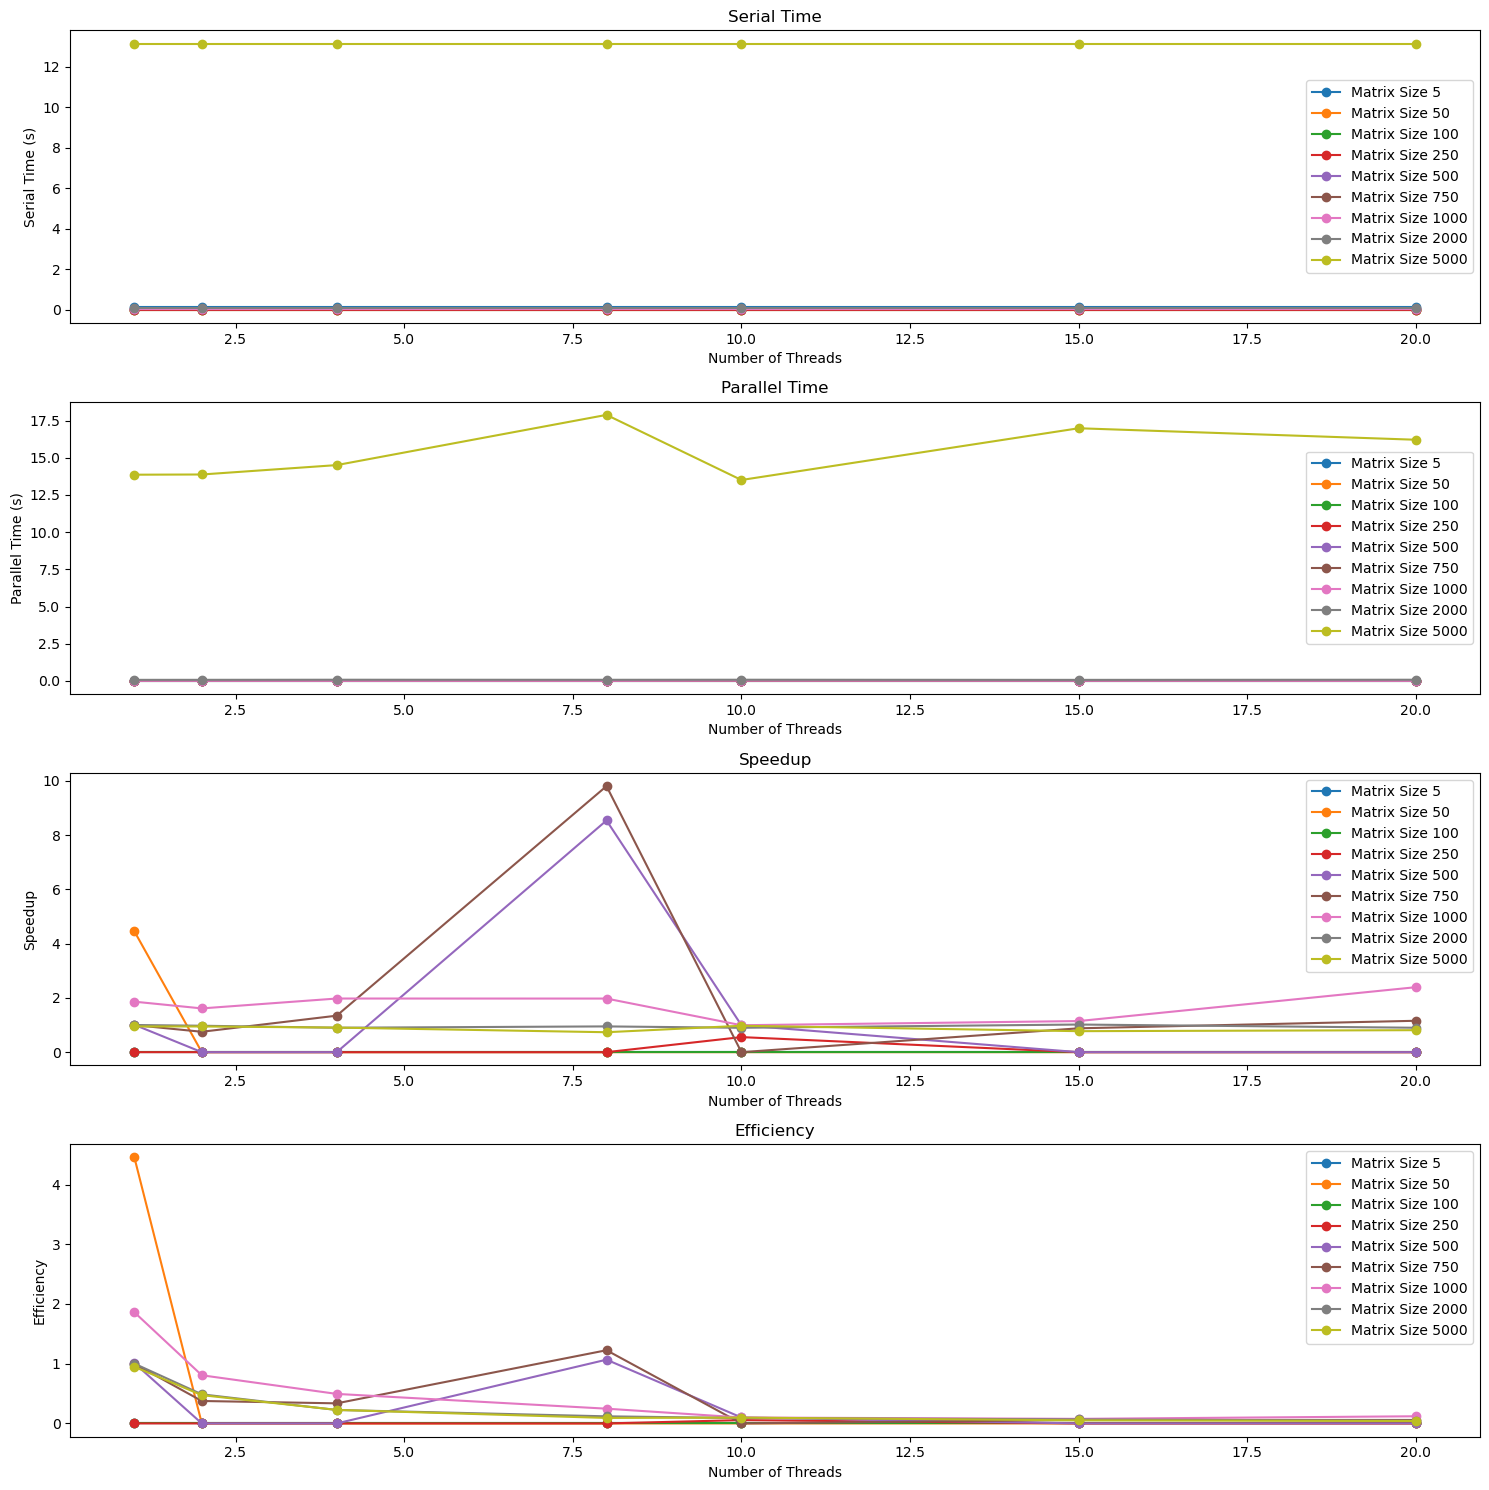

In [8]:
def plot_matrix_size(df3, matrix_size):
    plt.figure(figsize=(15, 15))

    # Plot Serial Time
    plt.subplot(4, 1, 1)
    for size in matrix_sizes:
        data = df3[df3['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Serial Time'], label=f'Matrix Size {size}', marker='o')
    plt.title('Serial Time')
    plt.xlabel('Number of Threads')
    plt.ylabel('Serial Time (s)')
    plt.legend()

    # Plot Parallel Time
    plt.subplot(4, 1, 2)
    for size in matrix_sizes:
        data = df3[df3['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Parallel Time'], label=f'Matrix Size {size}', marker='o')
    plt.title('Parallel Time')
    plt.xlabel('Number of Threads')
    plt.ylabel('Parallel Time (s)')
    plt.legend()

    # Plot Speedup
    plt.subplot(4, 1, 3)
    for size in matrix_sizes:
        data = df3[df3['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Speedup'], label=f'Matrix Size {size}', marker='o')
    plt.title('Speedup')
    plt.xlabel('Number of Threads')
    plt.ylabel('Speedup')
    plt.legend()

    # Plot Efficiency
    plt.subplot(4, 1, 4)
    for size in matrix_sizes:
        data = df3[df3['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Efficiency'], label=f'Matrix Size {size}', marker='o')
    plt.title('Efficiency')
    plt.xlabel('Number of Threads')
    plt.ylabel('Efficiency')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame
matrix_sizes = df3['Matrix Size'].unique()
plot_matrix_size(df3, matrix_sizes)
